In [39]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

def plot(func, funcName):
    uPoints = np.linspace(0, 2000, 100)
    thetaPoints = np.linspace(-0.1, 1.1, 100)
    uMeshGrid, thetaMeshGrid = np.meshgrid(uPoints, thetaPoints)
    funcMeshGrid = func(uMeshGrid, thetaMeshGrid)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(uMeshGrid, thetaMeshGrid, funcMeshGrid, cmap='viridis', edgecolor='none')
    ax.set_xlabel(r'$u$')
    ax.set_ylabel(r'$\theta$')
    ax.set_zlabel(r'$' + funcName + r'$')
    ax.set_title(r'$' + funcName + r'(u, \theta)$')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    plt.tight_layout()
    plt.show()

def plot_animation(func, funcName):
    x = np.linspace(-0.003, 0.003, 100)
    y = np.linspace(-0.003, 0.003, 100)
    xMeshGrid, yMeshGrid = np.meshgrid(x, y)

    fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xMeshGrid, yMeshGrid, func(xMeshGrid, yMeshGrid, 0), cmap='viridis')
    fig.colorbar(contour, ax=ax)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'$' + funcName + r'(x, y, t)$')

    def update(t):
        ax.clear()
        contour = ax.contourf(xMeshGrid, yMeshGrid, func(xMeshGrid, yMeshGrid, t), cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(r'$' + funcName + r'(x, y, t)$' + f'at t={t:.2f}')
        return contour

    anim = FuncAnimation(fig, update, frames=np.linspace(0, 2 * np.pi / 30, 100), interval=50)
    return HTML(anim.to_jshtml())

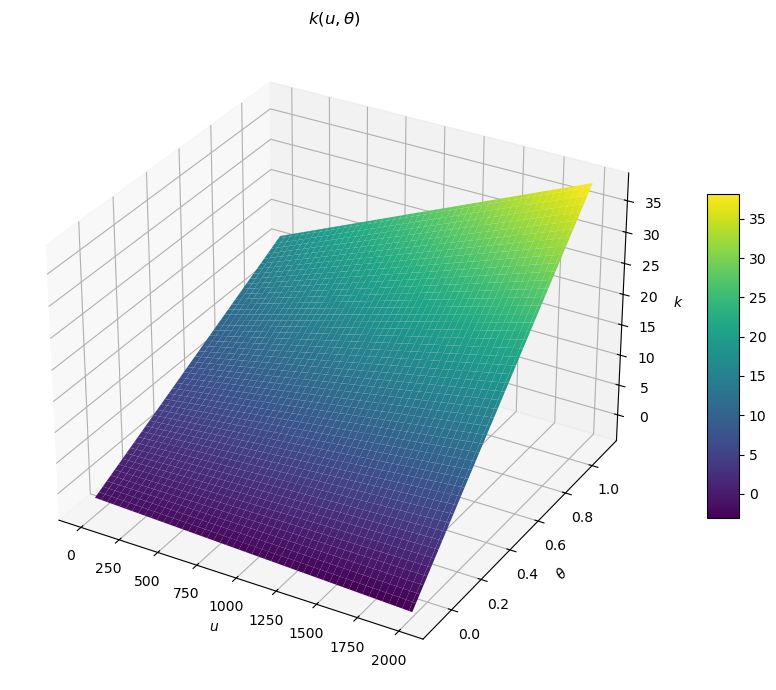

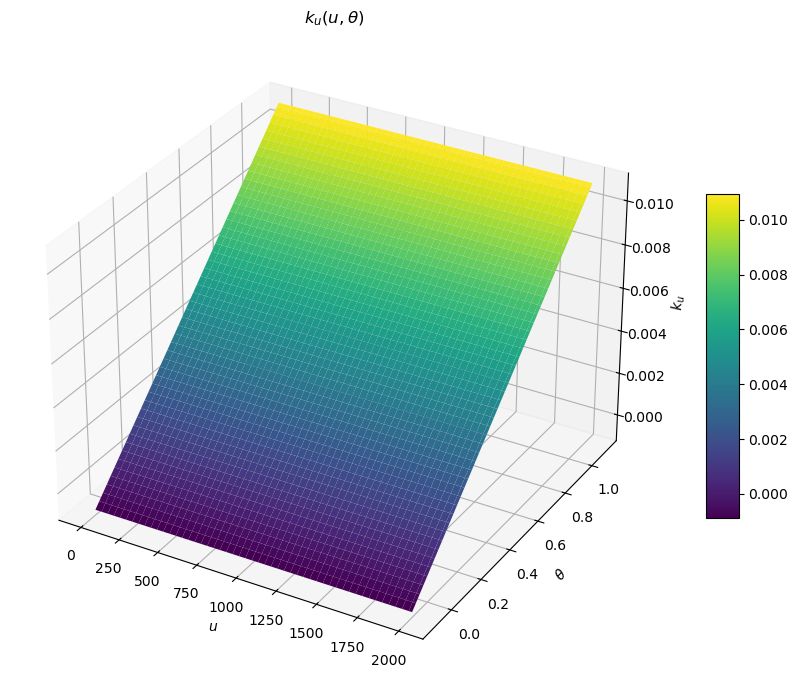

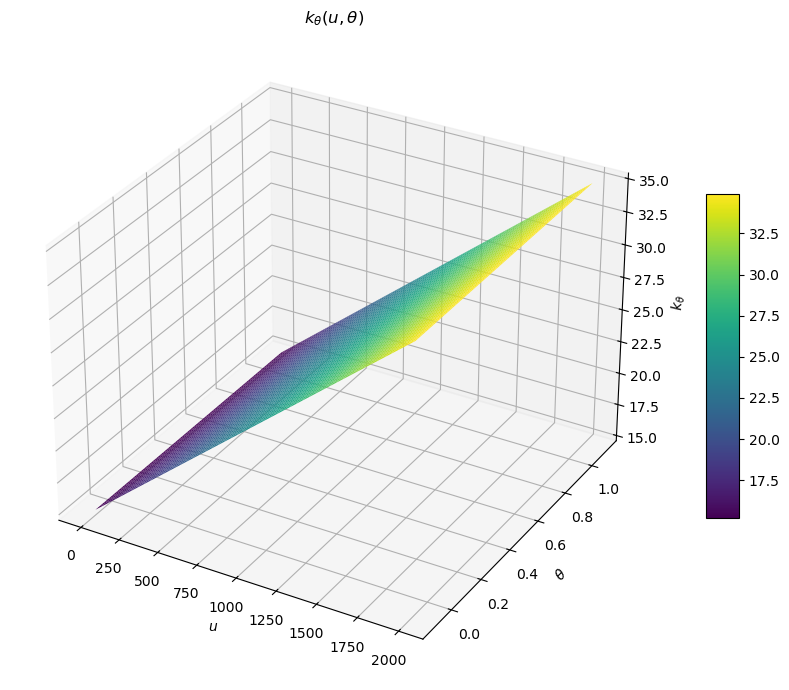

In [ ]:
k0 = 15 # wttttt / (m * K)
k1 = 0.01 # W / (m * K^2)

def k(u, theta):
    return (k0 + k1 * u) * theta

def k_u(u, theta):
    return k1 * theta

def k_theta(u, theta):
    return k0 + k1 * u

plot(k, r'k')
plot(k_u, r'k_u')
plot(k_theta, r'k_\theta')

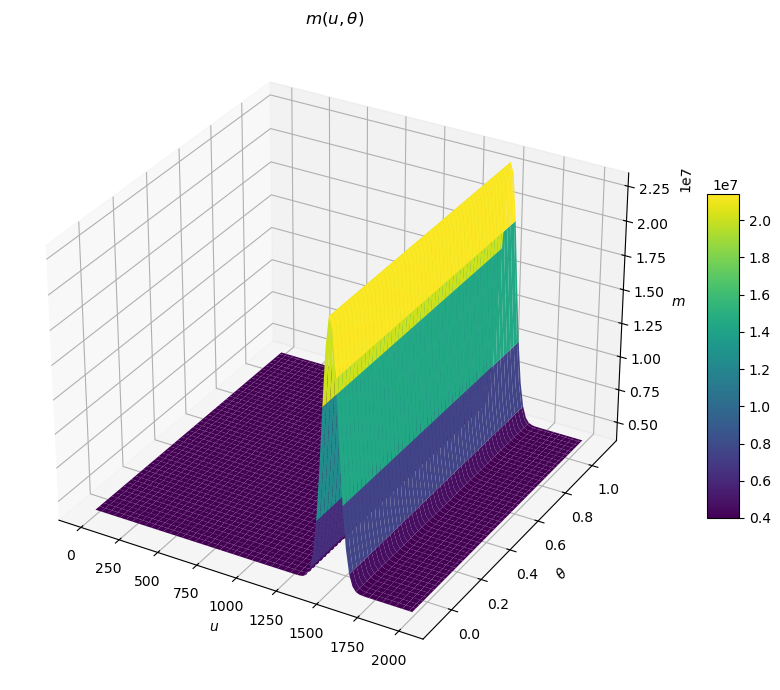

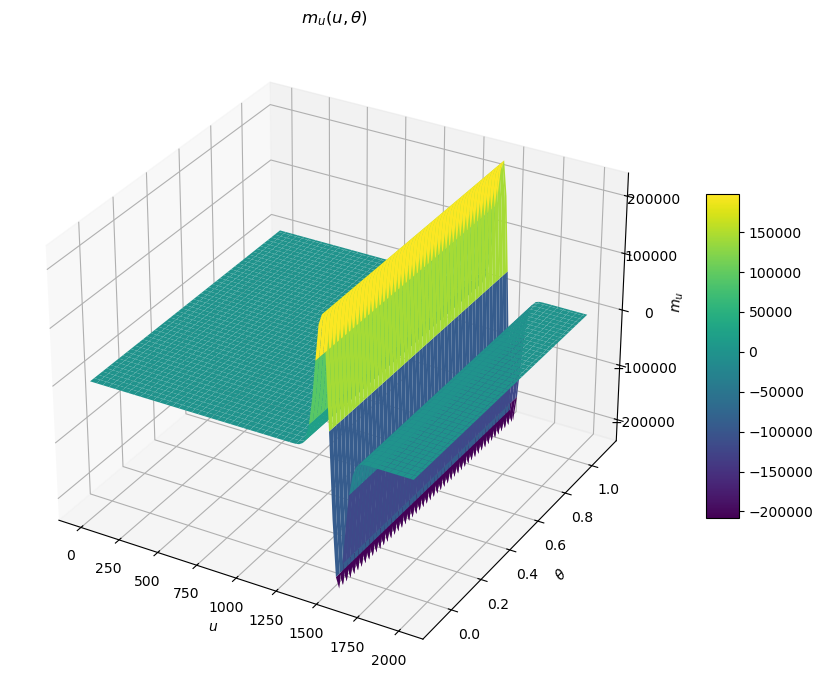

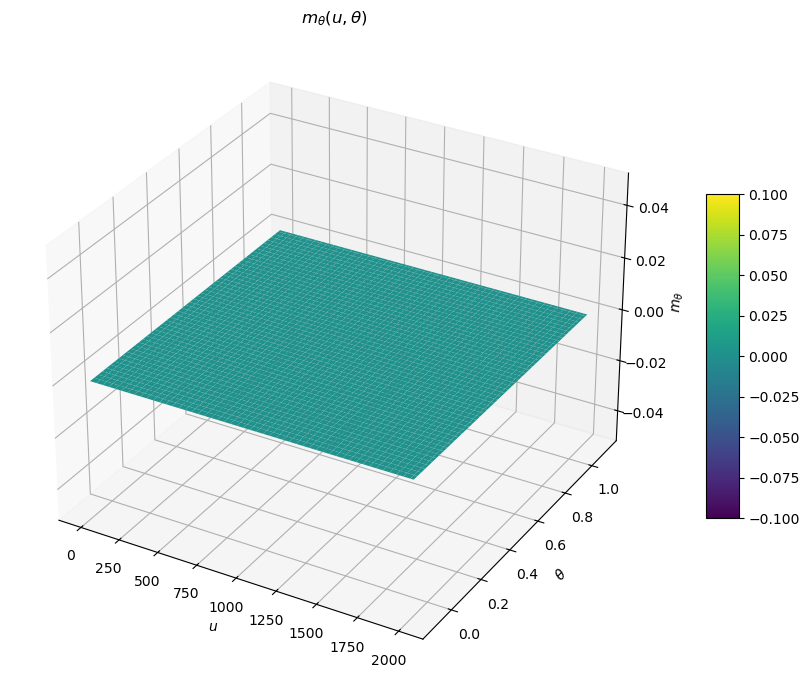

In [ ]:
from numpy import sqrt, pi, exp

rho0 = 8000 # kg / m^3
c0 = 500 # J / (kg * K)
H = 300000 # J / kg
dt = 100 # K
ut = 1500 # K

def m(u, theta):
    return rho0 * (c0 + H / (dt * sqrt(2 * pi)) * exp(-0.5 * ((u - ut) / dt)**2))

def m_u(u, theta):
    return -rho0 * H / (dt**3 * sqrt(2 * pi)) * (u - ut) * exp(-0.5 * ((u - ut) / dt)**2)

def m_theta(u, theta):
    return 0 * u

plot(m, r'm')
plot(m_u, r'm_u')
plot(m_theta, r'm_\theta')

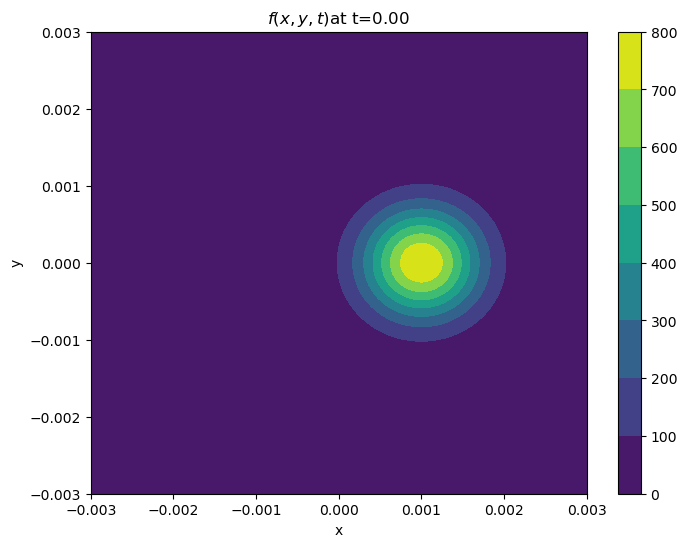

In [ ]:
from numpy import sin, cos, pi, exp

pl = 1.25e0 # W
rl = 0.0005 # m
r0 = 0.001 # m
r1 = 0 # m / s
wt = 30 # rad / s

def f(x, y, t):
    return pl / (2 * pi * rl**2) * exp(-1 / (2 * rl**2) * ((x - (r0 + r1 * t) * cos(wt * t))**2 + (y - (r0 + r1 * t) * sin(wt * t))**2))

plot_animation(f, r'f')

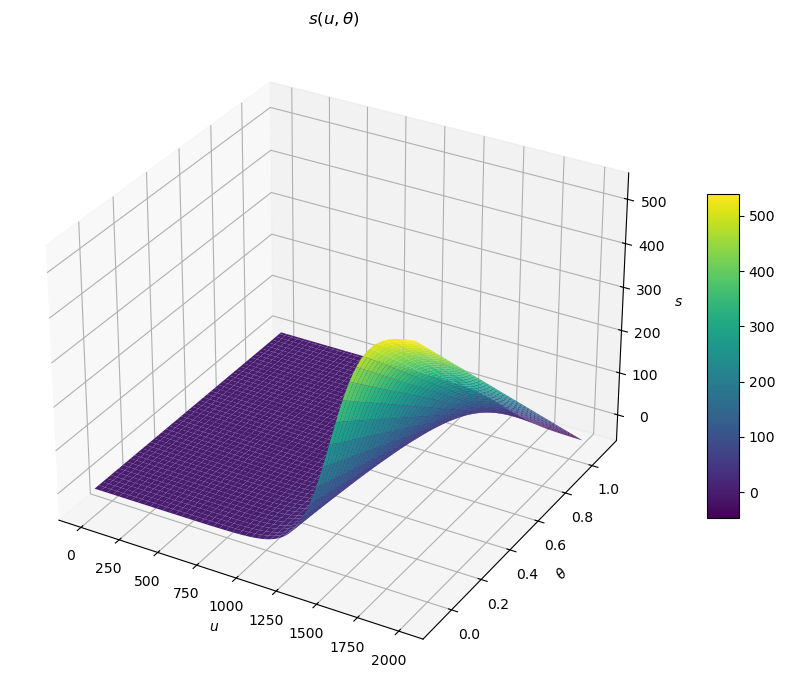

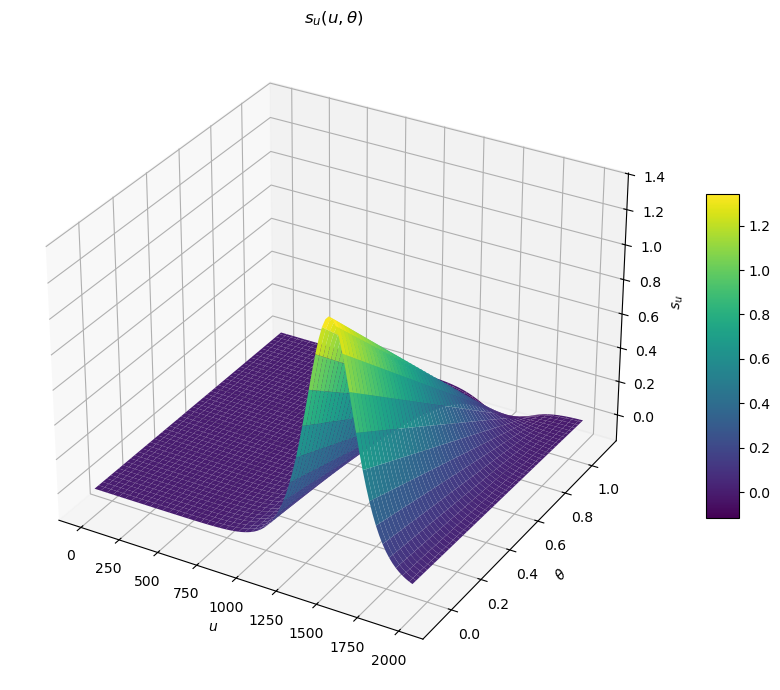

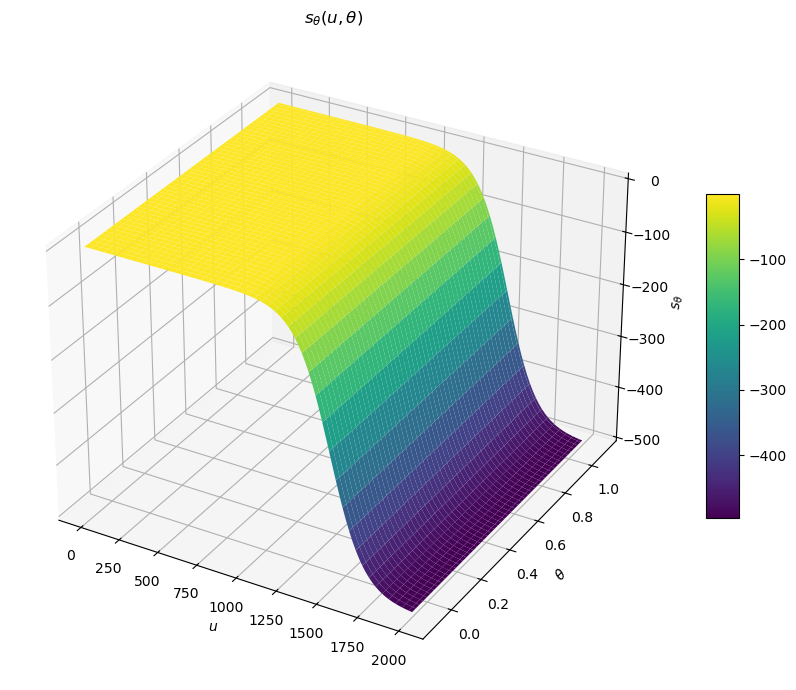

In [42]:
from numpy import exp

S = 5e2 # 1 / s
dt = 100 # K
ut = 1500 # K

def s(u, theta):
    return S * (1 - theta) / (1 + exp(-(u - ut) / dt))

def s_u(u, theta):
    return S * (1 - theta) / (dt * (1 + exp(-(u - ut) / dt))**2) * exp(-(u - ut) / dt)

def s_theta(u, theta):
    return -S / (1 + exp(-(u - ut) / dt))

plot(s, r's')
plot(s_u, r's_u')
plot(s_theta, r's_\theta')